# Linear Regression on Chicago Taxi Trips 2022 dataset
## Date : 15/07/2025

### Importing modules and libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

### Data cleaning

<Axes: xlabel='Trip Seconds', ylabel='Count'>

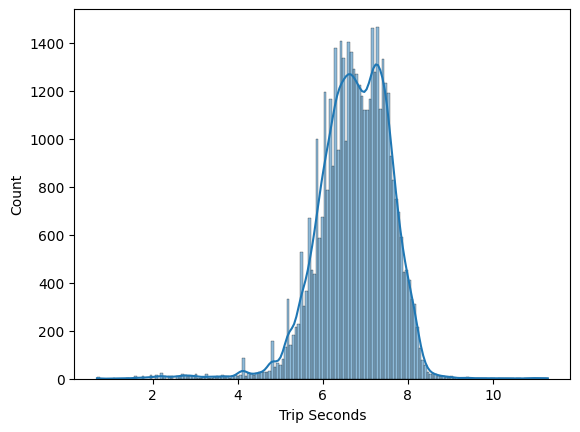

In [50]:
df = pd.read_csv('chicago_taxi_trips.csv', nrows=50000)
df = df.sample(frac=1, random_state=42)
df = df[(df['Trip Seconds'] != 0) & (df['Trip Miles'] != 0)]
df['Company'] = df['Company'].fillna('Unknown')

features = ['Trip Miles', 'Trip Seconds', 'Company']
target = 'Fare'

X = df[features]
y = df[target]
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

df['Trip Miles'] = np.log1p(df['Trip Miles'])
df['Trip Seconds'] = np.log1p(df['Trip Seconds'])
df['Fare'] = np.log1p(df['Fare'])

sns.histplot(df['Trip Seconds'], kde=True)


### Scaling and Execution

In [51]:

categorical_columns = ['Company']
numeric_columns = ['Trip Miles', 'Trip Seconds']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-square Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R-square Score: 0.8416810907211143
MSE: 39.70162092272231
